IMDB movie review modeling

What advice would you give management about such development? What kinds of methods and models would be needed? Would this be a substantial development project? Do you have any ideas about the information infrastructure needed to support conversational agents in a production environment?

In [1]:
from keras.datasets import imdb
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

Using TensorFlow backend.


In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras import models

In [3]:
##EDA https://machinelearningmastery.com/predict-sentiment-movie-reviews-using-deep-learning/
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [4]:
##training data shape review
print("Training data: ")
print(X.shape)
print(y.shape)
print("Classes: ")
print(np.unique(y))

Training data: 
(50000,)
(50000,)
Classes: 
[0 1]


In [5]:
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


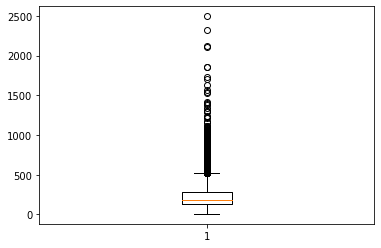

In [6]:
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [7]:
#####Analysis#####

In [8]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

In [9]:
def vectorize_sequences(sequences, dimension=5000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [10]:
# Our vectorized labels one-hot encoder
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(32, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
#Set validation set aside

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [14]:
start_time_m1 = time.time()
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
total_time_m1 = time.time() - start_time_m1

print("The Dense Convolutional Neural Network 1 layer took %.4f seconds to train." % (total_time_m1))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.5108 - acc: 0.7939 - val_loss: 0.3472 - val_acc: 0.8667
Epoch 2/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.2702 - acc: 0.8987 - val_loss: 0.2872 - val_acc: 0.8838
Epoch 3/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.2018 - acc: 0.9238 - val_loss: 0.2901 - val_acc: 0.8830
Epoch 4/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1649 - acc: 0.9412 - val_loss: 0.3101 - val_acc: 0.8807
Epoch 5/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1395 - acc: 0.9511 - val_loss: 0.3378 - val_acc: 0.8741
Epoch 6/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1190 - acc: 0.9597 - val_loss: 0.3672 - val_acc: 0.8693
Epoch 7/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1022 - acc: 0.9658 - val_loss: 0.4080 - 

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

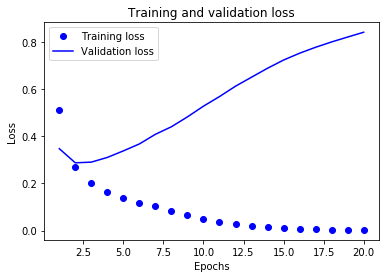

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

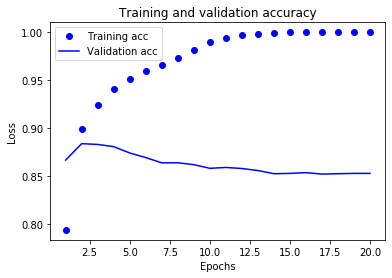

In [17]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                160032    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 161,121
Trainable params: 161,121
Non-trainable params: 0
_________________________________________________________________


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, auc
#predictions
pred = model.predict_classes(x_test)

#accuracy
accuracy_score(y_test,pred)

0.84532

[[10556  1944]
 [ 1923 10577]]


Text(0.5, 15.0, 'Predicted label')

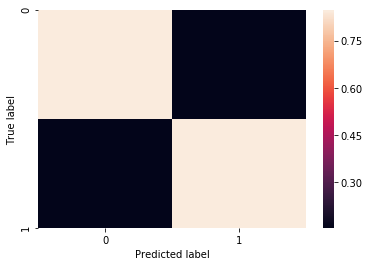

In [20]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, pred)
print(conf_mat)

conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

##DNN with 2 layers####

In [21]:
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [23]:
start_time_m2 = time.time()
history= model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
total_time_m2 = time.time() - start_time_m2

print("The Dense Convolutional Neural Network 2 layers took %.4f seconds to train." % (total_time_m2))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.5929 - acc: 0.7167 - val_loss: 0.4044 - val_acc: 0.8504
Epoch 2/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.2951 - acc: 0.8903 - val_loss: 0.2929 - val_acc: 0.8808
Epoch 3/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.2003 - acc: 0.9253 - val_loss: 0.3010 - val_acc: 0.8803
Epoch 4/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1610 - acc: 0.9397 - val_loss: 0.3239 - val_acc: 0.8774
Epoch 5/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1305 - acc: 0.9528 - val_loss: 0.3769 - val_acc: 0.8708
Epoch 6/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1059 - acc: 0.9641 - val_loss: 0.4008 - val_acc: 0.8688
Epoch 7/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.0820 - acc: 0.9743 - val_loss: 0.4502 - 

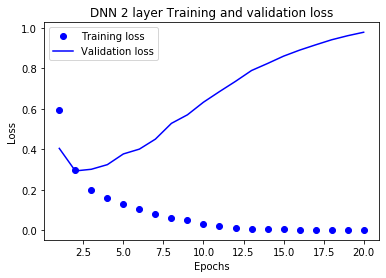

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('DNN 2 layer Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

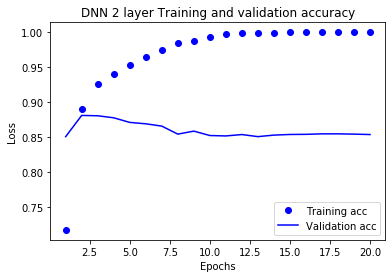

In [25]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('DNN 2 layer Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                160032    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 162,177
Trainable params: 162,177
Non-trainable params: 0
_________________________________________________________________


In [27]:
pred = model2.predict_classes(x_test)

#accuracy
accuracy_score(y_test,pred)

0.84288

In [28]:
####2 layer DNN change of optimizer add ES#

In [29]:
model2a = models.Sequential()
model2a.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model2a.add(layers.Dense(32, activation='relu'))
model2a.add(layers.Dense(32, activation='relu'))
model2a.add(layers.Dense(1, activation='sigmoid'))

model2a.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

start_time_m2a = time.time()
history= model2a.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val), callbacks=[es])
total_time_m2a = time.time() - start_time_m2a

print("The Dense Convolutional Neural Network 2 layers Optimzed took %.4f seconds to train." % (total_time_m2a))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.5207 - acc: 0.7557 - val_loss: 0.3824 - val_acc: 0.8501
Epoch 2/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.2961 - acc: 0.8886 - val_loss: 0.2925 - val_acc: 0.8817
Epoch 3/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.2305 - acc: 0.9117 - val_loss: 0.3073 - val_acc: 0.8776
Epoch 00003: early stopping
The Dense Convolutional Neural Network 2 layers Optimzed took 5.7809 seconds to train.


In [30]:
results2a=model2a.evaluate(x_test, y_test)
results2a

25000/25000 [==============================] - 2s 84us/step


[0.3207774051761627, 0.8704000115394592]

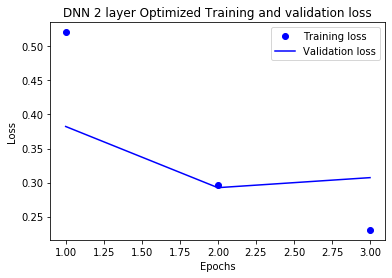

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('DNN 2 layer Optimized Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

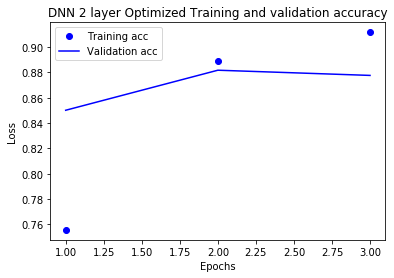

In [32]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('DNN 2 layer Optimized Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [33]:
####1D CNN #####

In [34]:
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing import sequence
np.random.seed(7)

In [35]:
# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

In [36]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


In [37]:
#Set validation set aside

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [38]:
print('x_val shape:', x_val.shape)

x_val shape: (10000, 400)


In [39]:
model3a = models.Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model3a.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model3a.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model3a.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model3a.add(Dense(hidden_dims))
model3a.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model3a.add(Dense(1))
model3a.add(Activation('sigmoid'))

model3a.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [40]:
start_time_m3a = time.time()
history = model3a.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), callbacks=[es])

total_time_m3a = time.time() - start_time_m3a

print("The 1D CNN took %.4f seconds to train." % (total_time_m3a))
results3a=model3a.evaluate(x_test, y_test)
results3a

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 61s 4ms/step - loss: 0.6836 - acc: 0.5957 - val_loss: 0.6538 - val_acc: 0.6397
Epoch 2/20
15000/15000 [==============================] - 60s 4ms/step - loss: 0.5139 - acc: 0.7914 - val_loss: 0.3815 - val_acc: 0.8314
Epoch 3/20
15000/15000 [==============================] - 55s 4ms/step - loss: 0.2962 - acc: 0.8787 - val_loss: 0.2982 - val_acc: 0.8747
Epoch 4/20
15000/15000 [==============================] - 48s 3ms/step - loss: 0.1979 - acc: 0.9264 - val_loss: 0.2791 - val_acc: 0.8849
Epoch 5/20
15000/15000 [==============================] - 52s 3ms/step - loss: 0.1342 - acc: 0.9575 - val_loss: 0.2816 - val_acc: 0.8879
Epoch 00005: early stopping
The 1D CNN took 276.5342 seconds to train.
25000/25000 [==============================] - 39s 2ms/step 


[0.285560665576458, 0.8830400109291077]

In [77]:
model3a.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 250)               62750     
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 251       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                

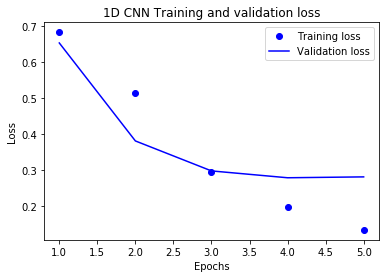

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('1D CNN Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

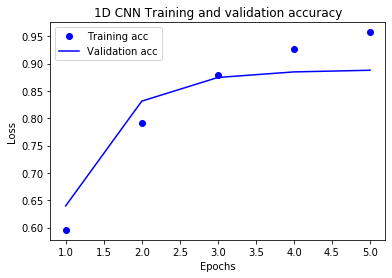

In [42]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('1D CNN Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
####1D CNN with drop out####

In [44]:
model3 = models.Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model3.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model3.add(Dropout(0.5))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model3.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model3.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model3.add(Dense(hidden_dims))
model3.add(Dropout(0.5))
model3.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model3.add(Dense(1))
model3.add(Activation('sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [45]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [46]:
start_time_m3 = time.time()
history = model3.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), callbacks=[es])

total_time_m3 = time.time() - start_time_m3

print("The 1D CNN dropout took %.4f seconds to train." % (total_time_m3))

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 51s 3ms/step - loss: 0.6934 - acc: 0.5079 - val_loss: 0.6896 - val_acc: 0.5079
Epoch 2/20
15000/15000 [==============================] - 52s 3ms/step - loss: 0.6765 - acc: 0.5816 - val_loss: 0.6309 - val_acc: 0.7051
Epoch 3/20
15000/15000 [==============================] - 52s 3ms/step - loss: 0.5340 - acc: 0.7569 - val_loss: 0.4275 - val_acc: 0.8122
Epoch 4/20
15000/15000 [==============================] - 52s 3ms/step - loss: 0.3844 - acc: 0.8329 - val_loss: 0.3489 - val_acc: 0.8511
Epoch 5/20
15000/15000 [==============================] - 50s 3ms/step - loss: 0.3139 - acc: 0.8703 - val_loss: 0.3189 - val_acc: 0.8654
Epoch 6/20
15000/15000 [==============================] - 51s 3ms/step - loss: 0.2676 - acc: 0.8905 - val_loss: 0.3060 - val_acc: 0.8736
Epoch 7/20
15000/15000 [==============================] - 50s 3ms/step - loss: 0.2331 - acc: 0.9069 - val_loss: 0.2989 - val_acc

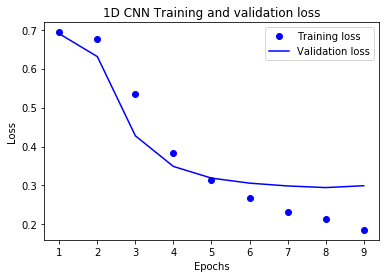

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('1D CNN dropout Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

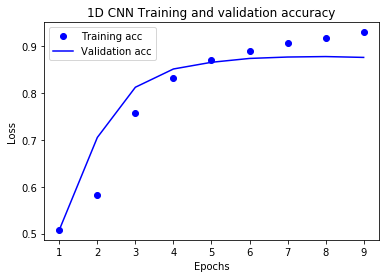

In [48]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('1D CNN dropout Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [49]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 250)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_3 (Activation)    (None, 250)              

In [50]:
results3=model3.evaluate(x_test, y_test)
results3

25000/25000 [==============================] - 39s 2ms/step


[0.3075513500499725, 0.8725200295448303]

In [51]:
####LSTM RNN#####

In [52]:
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

max_features=5000
model4 = models.Sequential()
model4.add(Embedding(max_features, 32))
model4.add(LSTM(32))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [53]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 168,353
Trainable params: 168,353
Non-trainable params: 0
_________________________________________________________________


In [54]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [55]:
start_time_m4 = time.time()
history = model4.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), callbacks=[es])
total_time_m4 = time.time() - start_time_m4

print("The LSTM layer took %.4f seconds to train." % (total_time_m4))


C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 34s 2ms/step - loss: 0.6802 - acc: 0.6295 - val_loss: 0.6003 - val_acc: 0.7022
Epoch 2/20
15000/15000 [==============================] - 34s 2ms/step - loss: 0.5730 - acc: 0.7387 - val_loss: 0.5335 - val_acc: 0.7366
Epoch 3/20
15000/15000 [==============================] - 32s 2ms/step - loss: 0.4372 - acc: 0.8170 - val_loss: 0.3880 - val_acc: 0.8478
Epoch 4/20
15000/15000 [==============================] - 32s 2ms/step - loss: 0.3282 - acc: 0.8756 - val_loss: 0.3401 - val_acc: 0.8595
Epoch 5/20
15000/15000 [==============================] - 33s 2ms/step - loss: 0.2619 - acc: 0.9045 - val_loss: 0.3086 - val_acc: 0.8763
Epoch 6/20
15000/15000 [==============================] - 32s 2ms/step - loss: 0.2156 - acc: 0.9241 - val_loss: 0.3134 - val_acc: 0.8744
Epoch 00006: early stopping
The LSTM layer took 198.5842 seconds to train.


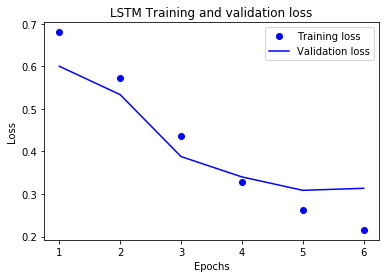

In [56]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('LSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

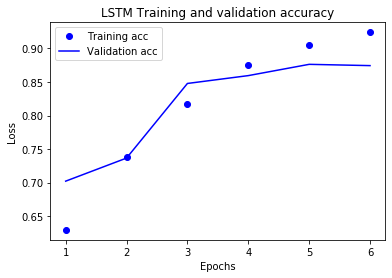

In [57]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('LSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [58]:
results=model4.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 54s 2ms/step


[0.32492368746757505, 0.8694000244140625]

In [59]:
####CNN & LSTM####

In [60]:
from keras.layers import MaxPooling1D
embedding_vecor_length = 32

model5 = models.Sequential()
model5.add(Embedding(max_features, embedding_vecor_length, input_length=400))
model5.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model5.add(MaxPooling1D(pool_size=2))
model5.add(LSTM(32))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [61]:
start_time_m5 = time.time()
history = model5.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), callbacks=[es])
total_time_m5 = time.time() - start_time_m5

print("The CNN & LSTM layer took %.4f seconds to train." % (total_time_m5))

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 27s 2ms/step - loss: 0.6880 - acc: 0.5921 - val_loss: 0.6565 - val_acc: 0.7108
Epoch 2/20
15000/15000 [==============================] - 26s 2ms/step - loss: 0.5080 - acc: 0.7751 - val_loss: 0.3763 - val_acc: 0.8533
Epoch 3/20
15000/15000 [==============================] - 24s 2ms/step - loss: 0.3177 - acc: 0.8755 - val_loss: 0.3433 - val_acc: 0.8540
Epoch 4/20
15000/15000 [==============================] - 24s 2ms/step - loss: 0.2530 - acc: 0.9042 - val_loss: 0.2959 - val_acc: 0.8784
Epoch 5/20
15000/15000 [==============================] - 24s 2ms/step - loss: 0.1954 - acc: 0.9333 - val_loss: 0.3025 - val_acc: 0.8771
Epoch 00005: early stopping
The CNN & LSTM layer took 128.0339 seconds to train.


In [62]:
model5.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 400, 32)           160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 400, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 171,457
Trainable params: 171,457
Non-trainable params: 0
_________________________________________________________________


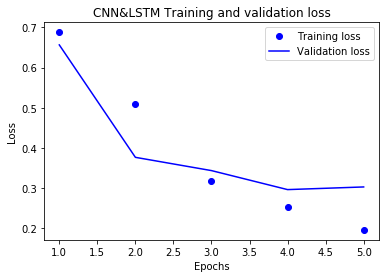

In [63]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('CNN&LSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

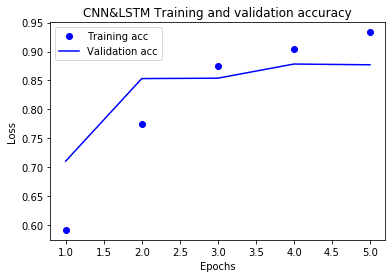

In [64]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('CNN&LSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [65]:
results5=model5.evaluate(x_test, y_test)
results5

25000/25000 [==============================] - 39s 2ms/step


[0.3157062283229828, 0.8710799813270569]

In [66]:
####CNN &LSTM optimizer#####

In [67]:
from keras.layers import MaxPooling1D
embedding_vecor_length = 32

model6 = models.Sequential()
model6.add(Embedding(max_features, embedding_vecor_length, input_length=400))
model6.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model6.add(MaxPooling1D(pool_size=2))
model6.add(LSTM(32))
model6.add(Dense(1, activation='sigmoid'))

model6.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [68]:
start_time_m6 = time.time()
history = model6.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), callbacks=[es])
total_time_m6 = time.time() - start_time_m6

print("The CNN & LSTM Optimizer RMSprop layer took %.4f seconds to train." % (total_time_m6))
results6=model6.evaluate(x_test, y_test)
results6

C:\Users\syurasek\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 25s 2ms/step - loss: 0.6506 - acc: 0.6310 - val_loss: 0.5352 - val_acc: 0.7823
Epoch 2/20
15000/15000 [==============================] - 24s 2ms/step - loss: 0.4847 - acc: 0.8005 - val_loss: 0.4342 - val_acc: 0.8318
Epoch 3/20
15000/15000 [==============================] - 24s 2ms/step - loss: 0.3771 - acc: 0.8496 - val_loss: 0.3765 - val_acc: 0.8607
Epoch 4/20
15000/15000 [==============================] - 25s 2ms/step - loss: 0.3103 - acc: 0.8797 - val_loss: 0.3328 - val_acc: 0.8649
Epoch 5/20
15000/15000 [==============================] - 25s 2ms/step - loss: 0.2739 - acc: 0.8945 - val_loss: 0.3855 - val_acc: 0.8356
Epoch 00005: early stopping
The CNN & LSTM Optimizer RMSprop layer took 126.9313 seconds to train.
25000/25000 [==============================] - 33s 1ms/step


[0.39002856410980224, 0.8317199945449829]

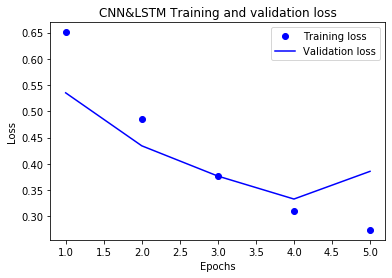

In [69]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('CNN&LSTM Optimizer Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

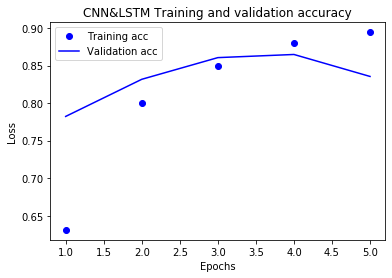

In [70]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('CNN&LSTM Optimizer Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [74]:
models = ['Model 1','Model 2','Model 3','Model 4','Model 5','Model 6', 'Model 7', 'Model 8']
methods = ['1L DNN','2L DNN','2L DNN OPT','1D CNN','1D CNN DROPOUT','LSTM','CNN&LSTM', 'CNN&LSTM OPT']
epochs = ['20','20','2','5','9','6','5','5']
optimizer = ['Adam','Adam','Rmsprop','Adam','Adam','Adam','Adam', 'Rmsprop']
es = ['No','No','Yes','Yes','Yes','Yes','Yes','Yes']
accuracy_metric = ['0.84532','0.84288','0.87040','0.88304','0.87252','0.86940', '0.87107','0.83171' ]
time = ['32.8294','33.5044','5.7809','276.5342','462.678','198.5842','128.0339 ', '126.9313']

In [75]:
model_comparison = pd.DataFrame(
    {'Model': models,
     'Methods': methods,
     'Epochs':epochs,
     'EarlyStopping': es,
     'Optimizer' : optimizer,
     'Accuracy': accuracy_metric,
     'RunTime (Seconds)': time,
    })

In [76]:
model_comparison

,Model,Methods,Epochs,EarlyStopping,Optimizer,Accuracy,RunTime (Seconds)
0,Model 1,1L DNN,20,No,Adam,0.84532,32.8294
1,Model 2,2L DNN,20,No,Adam,0.84288,33.5044
2,Model 3,2L DNN OPT,2,Yes,Rmsprop,0.87040,5.7809
3,Model 4,1D CNN,5,Yes,Adam,0.88304,276.5342
4,Model 5,1D CNN DROPOUT,9,Yes,Adam,0.87252,462.678
5,Model 6,LSTM,6,Yes,Adam,0.86940,198.5842
6,Model 7,CNN&LSTM,5,Yes,Adam,0.87107,128.0339
7,Model 8,CNN&LSTM OPT,5,Yes,Rmsprop,0.83171,126.9313
